In [1]:
pip install Faker

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import random
import pandas as pd
from faker import Faker
fake = Faker()

np.random.seed(42);
n_registros = 50;
products = [
    'Camélia',
    'Tulipa',
    'Orquídea',
    'Rosa',
    'Girassol',
    'Margarida',
    'Lírio-do-vale-azul',
    'Lótus',
    'Vitória-régia',
    'Botão-de-ouro',
]
dataframe_data = {
    'ID_Venda': range(1, n_registros + 1),
    'Nome_Produto': [random.choice(products) for _ in range(n_registros)],
    'Categoria': [fake.company_suffix() for _ in range(n_registros)],  
    'Preço': [random.randint(1, 1000) for _ in range(n_registros)], 
    'Quantidade_Vendida': [random.randint(1, 100) for _ in range(n_registros)], 
    'ID_Loja': [random.randint(1, 10) for _ in range(n_registros)],  
    'Localidade_Loja': [fake.city() for _ in range(n_registros)], 
    'Data_Venda': pd.date_range(start='1/1/2024', periods=n_registros, freq='D')
}

df = pd.DataFrame(dataframe_data)

df.to_csv('vendas.csv', index=False)

print(df)

    ID_Venda        Nome_Produto Categoria  Preço  Quantidade_Vendida  \
0          1               Lótus  and Sons    527                  44   
1          2            Orquídea  and Sons    242                  95   
2          3           Margarida       LLC    922                  39   
3          4           Margarida       LLC    768                  31   
4          5           Margarida       Ltd    610                  78   
5          6             Camélia       Ltd    765                  45   
6          7            Orquídea       Inc    860                  40   
7          8               Lótus       Inc    665                  17   
8          9  Lírio-do-vale-azul       PLC    996                  53   
9         10  Lírio-do-vale-azul       PLC    527                  45   
10        11  Lírio-do-vale-azul       Inc    980                   3   
11        12           Margarida     Group    558                  24   
12        13           Margarida       PLC    133  

In [3]:
#Qual é o total de vendas por produto?
total_vendas_produto = df.groupby('Nome_Produto')['Quantidade_Vendida'].sum()

print(total_vendas_produto.sort_values(ascending=False))

Nome_Produto
Margarida             437
Camélia               402
Lírio-do-vale-azul    385
Vitória-régia         316
Lótus                 283
Rosa                  232
Tulipa                207
Orquídea              206
Girassol                3
Name: Quantidade_Vendida, dtype: int64


## Análise Exploratório

In [4]:
#Qual é a loja que vendeu mais produtos?
loja_mais_vendeu = df.groupby('ID_Loja')['Quantidade_Vendida'].sum().sort_values(ascending=False).index[0]
print(f'A loja que mais vendeu foi a loja {loja_mais_vendeu}')

A loja que mais vendeu foi a loja 5


In [5]:
#Qual categoria de produto teve mais vendas em termos de quantidade?

categoria_mais_vendida = df.groupby('Categoria')['Quantidade_Vendida'].sum().sort_values(ascending=False).index[0]
print(f'A categoria que mais vendeu foi a categoria {categoria_mais_vendida}')

A categoria que mais vendeu foi a categoria Inc


In [6]:
#Identifique qual mês do ano teve mais vendas (quantidade) e qual mês gerou mais receita (valor total de vendas).

df['Mes'] = df['Data_Venda'].dt.month
mes_mais_vendas = df.groupby('Mes')['Quantidade_Vendida'].sum().sort_values(ascending=False).index[0]
mes_mais_receita = df.groupby('Mes')['Preço'].sum().sort_values(ascending=False).index[0]

print(f'O mês com mais vendas foi o mês {mes_mais_vendas}')

O mês com mais vendas foi o mês 1


In [7]:
#Agrupe os dados por categoria e calcule a média de vendas por produto dentro de cada categoria.

media_vendas_categoria = df.groupby('Categoria')['Quantidade_Vendida'].mean()
print(media_vendas_categoria)

Categoria
Group       33.666667
Inc         58.666667
LLC         47.777778
Ltd         50.428571
PLC         36.600000
and Sons    54.454545
Name: Quantidade_Vendida, dtype: float64


In [8]:
#Quais produtos tiveram as melhores vendas em cada localidade?

melhores_vendas_localidade = df.groupby(['Localidade_Loja', 'Nome_Produto'])['Quantidade_Vendida'].sum().sort_values(ascending=False)
print(melhores_vendas_localidade)

Localidade_Loja       Nome_Produto      
Carneyshire           Orquídea              95
Smithshire            Vitória-régia         94
Lake Emilyport        Camélia               93
Natashaton            Lírio-do-vale-azul    91
West Petershire       Lótus                 91
Port Amyland          Vitória-régia         88
Charlestown           Margarida             86
Mariefort             Rosa                  83
Perkinsview           Camélia               79
Crystalburgh          Margarida             78
Lake Michelleview     Vitória-régia         78
Schmidthaven          Tulipa                77
Sawyerton             Rosa                  76
Angelicaton           Margarida             73
Port Tanyaport        Rosa                  73
Lake Lindseyborough   Tulipa                69
Matthewbury           Camélia               59
Port Teresa           Lírio-do-vale-azul    59
Cynthiamouth          Camélia               58
Millerburgh           Lótus                 53
Gregorystad        

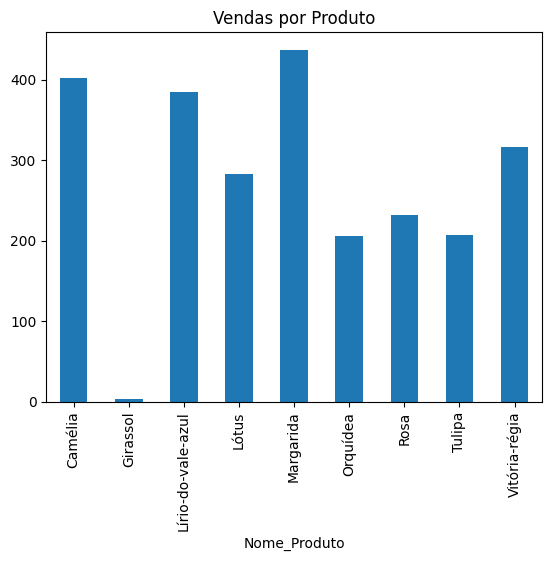

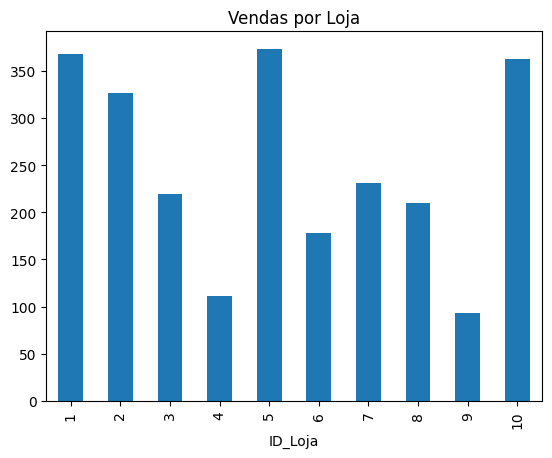

In [10]:
#Crie gráficos de barras para visualizar as vendas por produto e por loja.

import matplotlib.pyplot as plt

df.groupby('Nome_Produto')['Quantidade_Vendida'].sum().plot(kind='bar')
plt.title('Vendas por Produto')
plt.show()

df.groupby('ID_Loja')['Quantidade_Vendida'].sum().plot(kind='bar')

plt.title('Vendas por Loja')
plt.show()

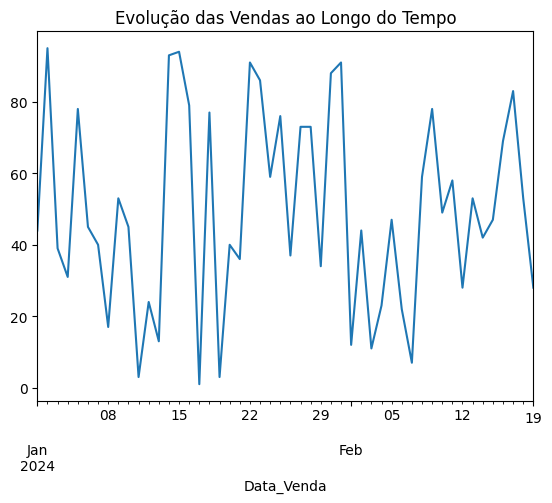

In [11]:
#Crie um gráfico de linha para mostrar a evolução das vendas ao longo do tempo.

df.groupby('Data_Venda')['Quantidade_Vendida'].sum().plot(kind='line')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.show()